# Ionosphere Dataset

# 1: Introduction

The Ionosphere Dataset requires the prediction of structure in the atmosphere given radar returns targeting free electrons in the ionosphere.

It is a binary (2-class) classification problem. The number of observations for each class is not balanced. There are 351 observations with 34 input variables and 1 output variable. The variable names are as follows:

1. 17 pairs of radar return data.
2. …
3. Class (g for good and b for bad).

# 2: Data Pre processing

## 2.1 Loading the required Libraries

In [1]:
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

#ML imports
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## 2.2 Get Data

In [2]:
## Loading the dataset from github repo
url = 'https://raw.githubusercontent.com/hargurjeet/MachineLearning/Ionosphere/ionosphere_data.csv'
df = pd.read_csv(url)

df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,column_l,column_m,column_n,column_o,column_p,column_q,column_r,column_s,column_t,column_u,column_v,column_w,column_x,column_y,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,True,False,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,True,False,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,True,False,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,True,False,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,True,False,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   column_a   351 non-null    bool   
 1   column_b   351 non-null    bool   
 2   column_c   351 non-null    float64
 3   column_d   351 non-null    float64
 4   column_e   351 non-null    float64
 5   column_f   351 non-null    float64
 6   column_g   351 non-null    float64
 7   column_h   351 non-null    float64
 8   column_i   351 non-null    float64
 9   column_j   351 non-null    float64
 10  column_k   351 non-null    float64
 11  column_l   351 non-null    float64
 12  column_m   351 non-null    float64
 13  column_n   351 non-null    float64
 14  column_o   351 non-null    float64
 15  column_p   351 non-null    float64
 16  column_q   351 non-null    float64
 17  column_r   351 non-null    float64
 18  column_s   351 non-null    float64
 19  column_t   351 non-null    float64
 20  column_u  

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
column_c,351.0,0.641342,0.497708,-1.0,0.472135,0.87111,1.000000,1.0
column_d,351.0,0.044372,0.441435,-1.0,-0.064735,0.01631,0.194185,1.0
column_e,351.0,0.601068,0.519862,-1.0,0.412660,0.80920,1.000000,1.0
column_f,351.0,0.115889,0.460810,-1.0,-0.024795,0.02280,0.334655,1.0
column_g,351.0,0.550095,0.492654,-1.0,0.211310,0.72873,0.969240,1.0
column_h,351.0,0.119360,0.520750,-1.0,-0.054840,0.01471,0.445675,1.0
column_i,351.0,0.511848,0.507066,-1.0,0.087110,0.68421,0.953240,1.0
column_j,351.0,0.181345,0.483851,-1.0,-0.048075,0.01829,0.534195,1.0
column_k,351.0,0.476183,0.563496,-1.0,0.021120,0.66798,0.957895,1.0
column_l,351.0,0.155040,0.494817,-1.0,-0.065265,0.02825,0.482375,1.0


## 2.3 Cleaning the dataset

In [5]:
df.column_ai.value_counts()

g    225
b    126
Name: column_ai, dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
# Dropping all the duplicate values
df.drop_duplicates(subset=None, keep='first', inplace=True)

In [8]:
df.isnull().sum()

column_a     0
column_b     0
column_c     0
column_d     0
column_e     0
column_f     0
column_g     0
column_h     0
column_i     0
column_j     0
column_k     0
column_l     0
column_m     0
column_n     0
column_o     0
column_p     0
column_q     0
column_r     0
column_s     0
column_t     0
column_u     0
column_v     0
column_w     0
column_x     0
column_y     0
column_z     0
column_aa    0
column_ab    0
column_ac    0
column_ad    0
column_ae    0
column_af    0
column_ag    0
column_ah    0
column_ai    0
dtype: int64

In [9]:
sample_incomplete_rows = df[df.isnull().any(axis=1)].head()
sample_incomplete_rows

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,column_k,column_l,column_m,column_n,column_o,column_p,column_q,column_r,column_s,column_t,column_u,column_v,column_w,column_x,column_y,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai


# 3: Preparing the data for ML

## 3.1 Applying Train,test and Split

In [10]:
from sklearn.model_selection import train_test_split

X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]
validation_size = 0.2
seed = 7
X_train, Y_train, X_test, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed,shuffle=True)

# 4: Building ML models

## 4.1 Analysing the best model

In [11]:
# test options
num_folds = 10
seed = 7
scoring = 'accuracy'

# spot check some algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [12]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, X_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.850000 (0.065465)
LDA: 0.864286 (0.044607)
KNN: 0.828571 (0.076265)
CART: 0.850000 (0.067386)
NB: 0.892857 (0.063888)
SVM: 0.928571 (0.045175)


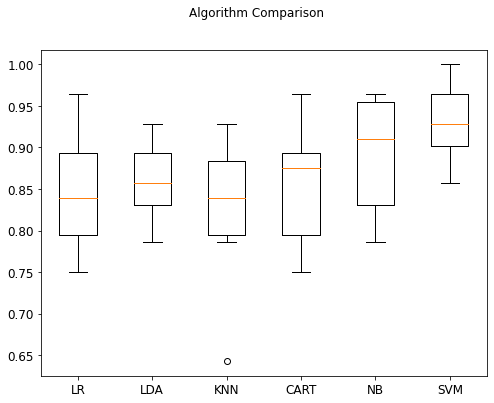

In [13]:
# compare algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
fig.set_size_inches(8,6)
plt.show()

SVM seems to be the most promising model

## 4.2 Hyperparameter Tunning

In [14]:
# SVM algorithm tuning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, X_test)

In [15]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
ranks = grid_result.cv_results_['rank_test_score']
for mean, stdev, param, rank in zip(means, stds, params, ranks):
    print("#%d %f (%f) with: %r" % (rank, mean, stdev, param))

Best: 0.939286 using {'C': 2.0, 'kernel': 'rbf'}
#24 0.860714 (0.046429) with: {'C': 0.1, 'kernel': 'linear'}
#40 0.664286 (0.053452) with: {'C': 0.1, 'kernel': 'poly'}
#10 0.928571 (0.050508) with: {'C': 0.1, 'kernel': 'rbf'}
#30 0.835714 (0.068139) with: {'C': 0.1, 'kernel': 'sigmoid'}
#11 0.882143 (0.050634) with: {'C': 0.3, 'kernel': 'linear'}
#39 0.696429 (0.051135) with: {'C': 0.3, 'kernel': 'poly'}
#9 0.932143 (0.054046) with: {'C': 0.3, 'kernel': 'rbf'}
#23 0.864286 (0.047380) with: {'C': 0.3, 'kernel': 'sigmoid'}
#12 0.878571 (0.053452) with: {'C': 0.5, 'kernel': 'linear'}
#38 0.707143 (0.041650) with: {'C': 0.5, 'kernel': 'poly'}
#2 0.935714 (0.047380) with: {'C': 0.5, 'kernel': 'rbf'}
#20 0.867857 (0.042408) with: {'C': 0.5, 'kernel': 'sigmoid'}
#16 0.875000 (0.048577) with: {'C': 0.7, 'kernel': 'linear'}
#37 0.714286 (0.045175) with: {'C': 0.7, 'kernel': 'poly'}
#4 0.932143 (0.049099) with: {'C': 0.7, 'kernel': 'rbf'}
#24 0.860714 (0.054046) with: {'C': 0.7, 'kernel': 'sigm

## 4.3 Running the ML on best optimal parameters identified

In [16]:
## Preparing Model

scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5) # rbf is default kernel
model.fit(rescaledX, X_test)

SVC(C=1.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
# estimate accuracy on validation set
rescaledValidationX = scaler.transform(Y_train)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.9571428571428572
[[21  2]
 [ 1 46]]
              precision    recall  f1-score   support

           b       0.95      0.91      0.93        23
           g       0.96      0.98      0.97        47

    accuracy                           0.96        70
   macro avg       0.96      0.95      0.95        70
weighted avg       0.96      0.96      0.96        70



The accuracy on the validation set was 96%.

In [18]:
some_date = X_train.iloc[0 : 6]
some_labels = X_test.iloc[0:6]

some_date_prepared = scaler.transform(some_date)

print("Predictions:", model.predict(some_date_prepared))
print("Labels:", list(some_labels))

Predictions: ['g' 'g' 'g' 'g' 'g' 'g']
Labels: ['g', 'g', 'g', 'g', 'g', 'g']
